#  ------------------------------------------- House Prices -------------------------------------------

- This problem is faced using supervised learning given the train file that you enter us and exits, where you then test it with the test file.

# IMPORTING LIBRARIES

- It imports the necessary libraries

In [1]:
# Libraries to use 

import numpy as np
import pandas as pd

# Visualization libraries

import matplotlib.pyplot as plote
import seaborn as sns # which provides a high-level interface to draw statistical graphics.


# GET DATA

DATA:

train.csv and test.csv


### Analyze the data

In [2]:
#IMPORT DATA 
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

print("Train",train.shape)
print("-"*15)
print("Test",test.shape)


Train (1460, 81)
---------------
Test (1459, 80)


- The csv train has 81 columns with 1460 rows
- The csv test has 80 columns with 1459 rows


In [3]:
#Visualize the data 
train.head() 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:

print(train['SaleCondition'].unique())
print(train['Utilities'].unique())

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
['AllPub' 'NoSeWa']


- Values for the SaleCondition column and Utilities are non-numeric as well as other characteristics

In [5]:
#Climbing:It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
from sklearn.preprocessing import LabelEncoder
for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,...,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,...,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,...,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,...,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,...,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000


- It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [6]:
#Display the data with its extra values such as minimum, maximum, total, etc of each characteristic.
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,70.049958,10516.828082,0.995890,1.903425,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,1.773288,103.685262,2.539726,3.733562,1.396575,2.305479,2.842466,2.310274,2.815068,443.639726,4.741781,46.549315,567.240411,1057.429452,1.036301,...,0.934932,3.682877,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,2.339726,6.517808,5.749315,0.613014,3.804795,2.485616,1978.506164,1.284247,1.767123,472.980137,3.927397,3.960959,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,2.991096,3.504795,3.922603,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,24.284752,9981.264932,0.063996,0.394776,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.635891,181.066207,0.693995,0.731807,0.722394,0.899225,0.676527,1.165663,1.874410,456.098091,0.946713,161.319273,441.866955,438.705324,0.295124,...,0.246731,1.051834,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.830161,1.625393,0.979659,0.644666,1.398954,1.933206,24.689725,0.892831,0.747315,213.804841,0.647822,0.566832,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.140703,1.082912,0.404103,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [7]:
#List the amount of numerical and categorical data
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Caracteristicas Numéricas: ", len(numerical_feats))
categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Características Categóricas: ", len(categorical_feats))

Caracteristicas Numéricas:  81
Características Categóricas:  0


- There are only numerical features thanks to Data Scaling

In [8]:
#Display percentage of missing data for each characteristic
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("-"*15,"Percentage of empty values for each Train characteristic","-"*15)
missing_data.head(6)



--------------- Percentage of empty values for each Train characteristic ---------------


,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000


- The PoolQC feature is one that has many empty values.
- There are empty columns (None) this means that you don't have a specific group.

In [9]:
# Fill in the columns: LotFrontage, GarageYrBlt, MasVnrArea for training and test data
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)
print("-"*15,"Percentage of empty values for each Train characteristic","-"*15)

total_t = test.isnull().sum().sort_values(ascending=False)
percent_t = (test.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_t = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_t.head(5)
#print("Test")



--------------- Percentage of empty values for each Train characteristic ---------------


,Total,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


- Complete columns but there are empty columns, which would not contribute much in my model.

In [10]:
train_ID = train['Id']
test_ID = test['Id']

# Split the data for training and testing

#Training
y_train = train['SalePrice']   
X_train = train.drop(['Id','SalePrice'], axis=1) 

#Testing
X_test = test.drop('Id', axis=1)

#Remove features that do not add to the model
Xmat = pd.concat([X_train, X_test])
Xmat = Xmat.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
Xmat = Xmat.fillna(Xmat.median())

-------------- Eliminated unnecessary columns --------------


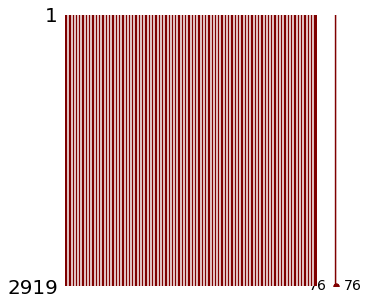

In [11]:
# Verify where nano-values still exist
import missingno as msno
msno.matrix(df=Xmat, figsize=(5,5), color=(0.5,0,0))

print("-"*14,"Eliminated unnecessary columns","-"*14)


In [12]:
#Save as target the output characteristic(y) 
target = 'SalePrice'
min_val_corr = 0.4    
drop_similar = 1
    

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


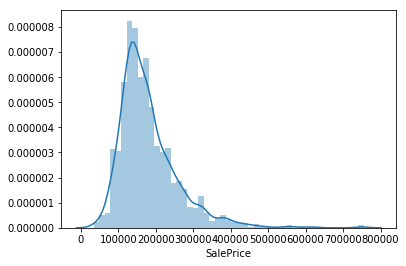

In [13]:
#DISPLAY THE RANGE OF THE OUTPUT CHARACTERISTIC
sns.distplot(train['SalePrice']);
plote.show()

- You must normalize Sale Price and then make correlations with the other characteristics and get information that will help me in my training.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


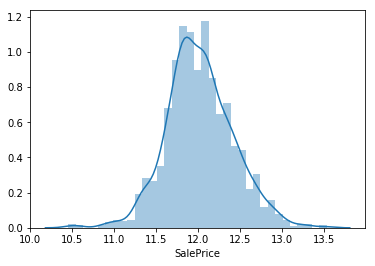

In [14]:
# normality check for the target Using LOG
y_train = np.log(y_train)
ax = sns.distplot(y_train)
plote.show()

In [15]:
corr = train.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

### Analize Data 2

In [16]:
#List of features and their correlation coefficient to target
print(ser_corr)
print("*"*30)
print("List of features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of features with r below min_val_corr :")
print(cols_bel_corr_limit)
print(ser_corr)
print("*"*30)
print("List of features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of features with r below min_val_corr :")
print(cols_bel_corr_limit)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
ExterQual       0.636884
GarageArea      0.623431
BsmtQual        0.620886
TotalBsmtSF     0.613581
1stFlrSF        0.605852
KitchenQual     0.589189
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
FireplaceQu     0.459605
GarageType      0.415283
HeatingQC       0.400178
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
BsmtExposure    0.309043
HalfBath        0.284108
LotArea         0.263843
                  ...   
Exterior2nd     0.103766
Exterior1st     0.103551
BsmtFinType1    0.103114
Heating         0.098812
PoolArea        0.092404
Condition1      0.091155
BldgType        0.085591
MSSubClass      0.084284
OverallCond     0.077856


- Analyze the correlation matrix

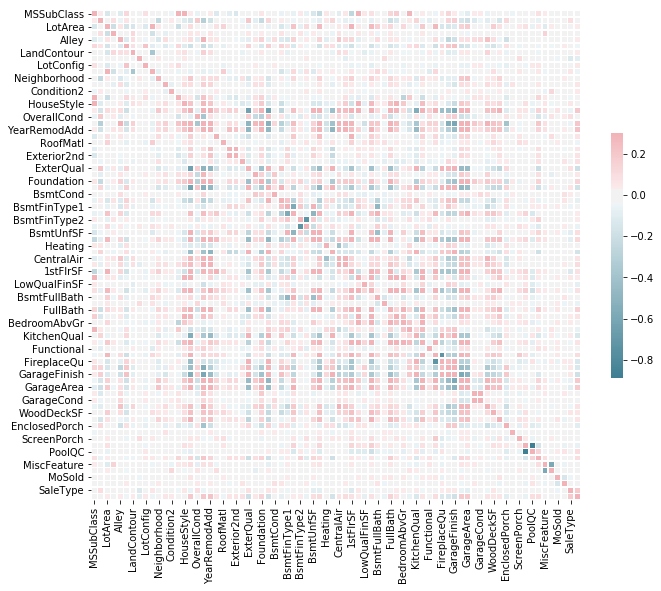

In [17]:
# train and test
X_train = Xmat.iloc[:train.shape[0],:]
X_test = Xmat.iloc[train.shape[0]:,:]
# Compute the correlation matrix
corr = X_train.corr()
# Set up the matplotlib figure
f, ax = plote.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plote.show()

- Feature importance : To select just the important features.

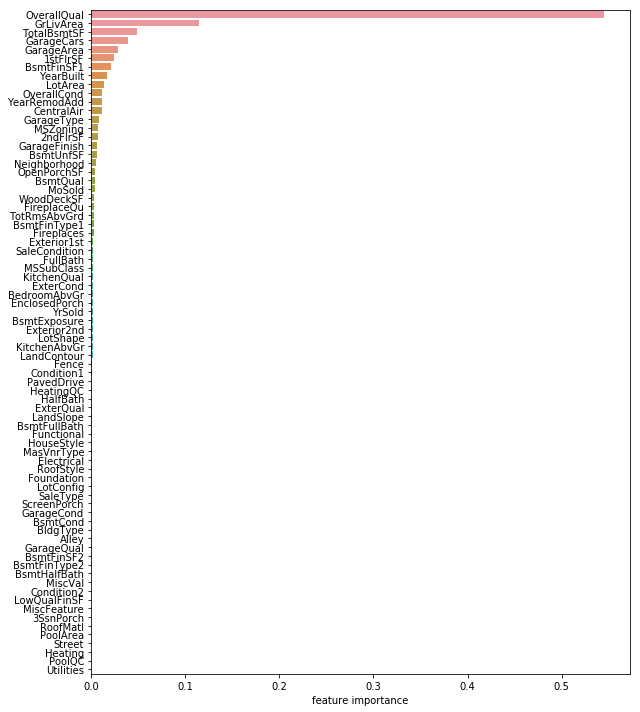

[15 43 35 57 58 40 31 17  2 16 18 38 55  1 41 56 34 10 63 27 72 62 54 51
 30 53 21 75 46  0 50 25 48 64 73 29 22  5 49  6 69 11 61 37 47 24  9 44
 52 14 23 39 19 26  8 74 66 60 28 13  4 59 33 32 45 71 12 42 70 65 20 67
  3 36 68  7]


In [18]:
#Feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)

ranking = np.argsort(-rf.feature_importances_)
f, ax = plote.subplots(figsize=(9, 10))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plote.tight_layout()
plote.show()
print(ranking)

 - Solo dos características son dominantes: 'OverallQual' y 'GrLivArea'. 

In [19]:
# Using only the 30 best features
X_train = X_train.iloc[:,ranking[:30]]
X_test = X_test.iloc[:,ranking[:30]]

# normalizing
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()


In [20]:
Xmat = X_train
Xmat['SalePrice'] = y_train
#Xmat = Xmat.drop(Xmat[(Xmat['TotalSF']>5) & (Xmat['SalePrice']<12.5)].index)
#Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>5) & (Xmat['SalePrice']<13)].index)

# Recovered from train conjuncts
y_train = Xmat['SalePrice']
X_train = Xmat.drop(['SalePrice'], axis=1)

# Training using libraries 

### Using sklearn : LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

print("Print Thetas")


12.024050901109383
[ 0.11132084  0.10322209  0.034181    0.05298672 -0.00332912  0.00814024
 -0.00426693  0.06137093  0.01989942  0.04731116  0.01969058  0.0181633
 -0.00881096 -0.01272892 -0.0005185  -0.00923891 -0.02253489  0.00244043
 -0.00032629 -0.02538964  0.00270466  0.01041682 -0.017973    0.01889265
 -0.0216534   0.01572381 -0.00052254  0.02322821  0.01056862 -0.0255838 ]
Print Thetas


- Testing using the data testing

In [22]:
y_pred_rl = np.exp(regressor.predict(X_train))
print (y_pred_rl)
y_pred_rl = np.exp(regressor.predict(X_test))
print (y_pred_rl)
print ("*"*13,"Print output values","*"*13)

[201826.77217775 204189.36561759 207877.87645496 ... 239574.85688223
 133139.06936694 149173.52326713]
[121002.86456543 158670.56721586 181753.13996919 ... 163530.42463461
 116394.67082772 246918.40919486]
************* Print output values *************


In [23]:
sub_rl = pd.DataFrame()
sub_rl['Id'] = test_ID
sub_rl['SalePrice'] = y_pred_rl 

## RIDGE

In [24]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train) 
print(reg.coef_)
print(reg.intercept_) 
reg.predict(X_test)

[ 0.11127581  0.09926134  0.03404523  0.05285031 -0.00320856  0.0110218
 -0.00411575  0.06121821  0.01989391  0.04724733  0.01974423  0.01820039
 -0.00879714 -0.01273434  0.00272182 -0.00926711 -0.02237621  0.0024599
 -0.00031137 -0.02538915  0.00269705  0.01042694 -0.01797036  0.01896882
 -0.02165478  0.01573214 -0.00050484  0.02320794  0.01059563 -0.02554684]
12.024050901109383


array([11.70407078, 11.97457179, 12.11046665, ..., 12.00499528,
       11.66505231, 12.41665602])

## LASSO

In [25]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:

reg.predict(X_test)

array([11.78468355, 11.95944155, 11.94380399, ..., 11.88838844,
       11.74595467, 12.25860904])

## Elastic Net

In [27]:
nr_cv = 5
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

from sklearn.linear_model import ElasticNet

enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_enet = GridSearchCV(enet, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_enet.fit(X_train, y_train)

sc_enet = get_best_score(grid_enet)
pred_enet = grid_enet.predict(X_test)

print(pred_enet)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.153158106235944
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.001}
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.04,
      max_iter=1000000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.001, warm_start=False)
[11.7280903  11.95436148 12.12323204 ... 12.00825382 11.66494668
 12.39938952]


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    3.5s finished


## SGD_Regressor

In [28]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_sgd.fit(X_train, y_train)

sc_sgd = get_best_score(grid_sgd)

pred_sgd = grid_sgd.predict(X_test)

print(pred_sgd)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If

0.15433817841950467
{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.01,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
[11.70187052 11.97344344 12.10997904 ... 12.00333291 11.66303005
 12.41765117]


## RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
grid_rf.fit(X_train, y_train)

sc_rf = get_best_score(grid_rf)
pred_RDM = grid_rf.predict(X_test)

print(pred_RDM)
print("ss")


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   31.9s finished


0.14078475005665614
{'min_samples_split': 6, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)
[11.74210696 11.94387851 12.11158032 ... 11.97352105 11.64790752
 12.36482114]
ss


In [30]:
sub_rf = pd.DataFrame()
sub_rf['Id'] = test_ID
sub_rf['SalePrice'] = pred_RDM 
 

### MY IMPLEMENTATION


In [31]:
def predict(theta, data):
    return np.dot(data, theta)
alpha = 0.01
iters = 1500
theta = np.zeros([X_train.shape[1],])

def cal_cost(theta, X, y):
    y_pred_test = predict(theta, X)
    to_sum = (y_pred_test - y) ** 2
    return np.sum(to_sum) / (X.shape[0])

def gradient_descent(X,y,theta):
    cost_history = np.zeros(iters)
    for it in range(iters):
        H_theta = predict(theta, X)
        theta = theta -(1/H_theta.shape[0])*alpha*( X.T.dot((H_theta - y)))
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history

theta, cost_history = gradient_descent(X_train, y_train, theta)

print(theta)


OverallQual      0.111587
GrLivArea        0.059318
TotalBsmtSF      0.024589
GarageCars       0.045944
GarageArea       0.003468
1stFlrSF         0.037286
BsmtFinSF1       0.006147
YearBuilt        0.058020
LotArea          0.020126
OverallCond      0.045905
YearRemodAdd     0.021280
CentralAir       0.018778
GarageType      -0.009198
MSZoning        -0.012489
2ndFlrSF         0.033234
GarageFinish    -0.009933
BsmtUnfSF       -0.012212
Neighborhood     0.002751
OpenPorchSF     -0.000324
BsmtQual        -0.025325
MoSold           0.002686
WoodDeckSF       0.010768
FireplaceQu     -0.017312
TotRmsAbvGrd     0.021310
BsmtFinType1    -0.022116
Fireplaces       0.016942
Exterior1st     -0.000628
SaleCondition    0.022728
FullBath         0.011667
MSSubClass      -0.025165
dtype: float64


In [32]:
X_train_array = np.array(X_train.values)
X_test_array = np.array(X_test.values)
y_predic_test = np.zeros(len(X_test_array))

print(theta.shape)
print(X_train_array.shape)
print(X_test_array.shape)
for x in range(len(X_train_array)-1):    
    y_res = theta[0]
    for i in range (1,theta.size-1):    
        y_res  += X_test_array[x][i]*theta[i]
    y_predic_test[x]=np.exp(y_res)


(30,)
(1460, 30)
(1459, 30)
[0.87569086 1.04919426 1.32875811 ... 1.17605627 0.86634524 1.5411525 ]
